In [5]:
import math
import numpy as np
import sys
#import cv2
import pickle
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [43]:
2501*2501

6255001

In [113]:
input_filename = "data/LAMP_80s_240mpp_ratio_albed_01.img"
shape = (2501, 2501) # matrix size
dtype = np.float32 # big-endian unsigned integer (16bit)
output_filename = "LAMP_BRITE.PNG"

In [203]:
height = np.reshape(np.fromfile(open("data/LDEM_75S_120M.IMG",
                                     'rb'), np.int16),
                    (7624,7624))
albedo = np.reshape(np.fromfile(open("data/LDAM_50S_1000M_FLOAT.IMG",
                                     'rb'), np.float32),
                    (2532,2532))
LAMP_ratio_albed = np.reshape(np.fromfile(open("data/LAMP_80s_240mpp_ratio_albed_01.img",
                                     'rb'), np.float32),
                    (2501,2501))
LAMP_ratio_brite = np.reshape(np.fromfile(open("data/LAMP_80s_240mpp_ratio_brite_01.img",
                                     'rb'), np.float32),
                    (2501,2501))

In [204]:
import cv2

height = height[1311:-1311,1311:-1311]
albedo = albedo[966:-966,966:-966]

#height = cv2.resize(height, dsize=LAMP_ratio_albed.shape)
lamp_brite = cv2.resize(LAMP_ratio_brite, dsize=height.shape)
lamp_albed = cv2.resize(LAMP_ratio_albed, dsize=height.shape)
albedo = cv2.resize(albedo, dsize=height.shape)

In [205]:
threshold_albedo = 0.35
threshold_lamp_ratio = 1.2

In [206]:
image = albedo > threshold_albedo

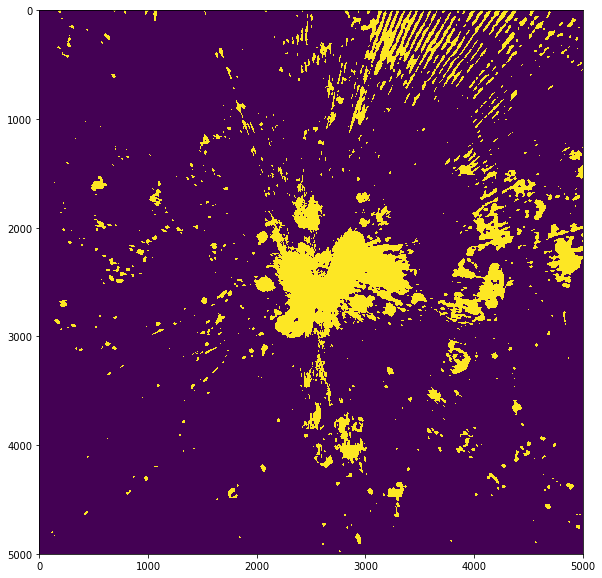

In [207]:
plt.imshow(image)
plt.savefig(output_filename)
plt.show()

In [208]:
np.array([True, True, False, False]) & np.array([True, False, True, False])  

array([ True, False, False, False])

In [216]:
POI = ((lamp_albed > threshold_lamp_ratio) & 
        (lamp_brite > threshold_lamp_ratio) & 
        (albedo > threshold_albedo))

/home/georgesmss/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [230]:
top_left = (200,200)
bottom_right = (top_left[0] + 200, top_left[0] + 200)

In [229]:
POI2 = POI * 200

In [242]:
POI3 = POI2
POI3[top_left[0]:top_left[0]+10,top_left[1]:bottom_right[1]] = 255
POI3[top_left[1],top_left[1]:bottom_right[1]] = 255

In [241]:
POI3.argmax()/5000

200.12

In [228]:
POI3 = cv2.rectangle(POI2, top_left, bottom_right, (0,255,0), 1)

TypeError: Layout of the output array img is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

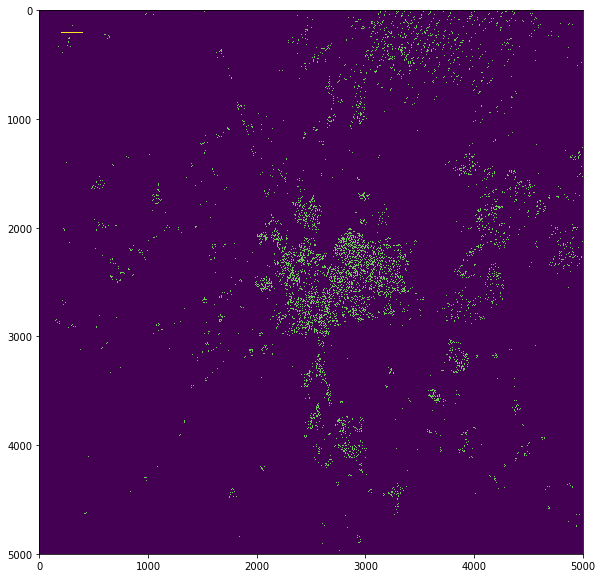

In [243]:
plt.imshow(POI3)
plt.savefig("agua_no_polo_sul_da_lua_uau.png")
plt.show()

In [218]:
km_per_px = 0.12
rover_max_dist_km = 24
rover_max_dist_px = rover_max_dist_km / km_per_px